# Preprocessing and EDA
The paper mentions they have already done required preprocessing, so we don't have to do that again. We only check the format of the given data, and convert it into a suitable format for plotting.

In [2]:
#requirements
# ! pip install pandas matplotlib seaborn openpyxl

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We load the data into a Pandas Dataframe and print it to see how the data are arranged.

In [4]:
df = pd.read_excel("./Curated_data_1234_datapoints.xlsx")

df.columns = df.columns.str.strip()


print(df.head)

<bound method NDFrame.head of       STY [mgMeOH h-1 gcat-1]    Family  Metal Loading [wt.%]  CR Metal [pm]  \
0                      2620.0     In2O3                   4.4            144   
1                      2400.0     In2O3                   4.4            144   
2                      2233.6        Cu                  36.5            138   
3                      2230.0     In2O3                   4.4            144   
4                      2224.0        Cu                  36.5            138   
...                       ...       ...                   ...            ...   
1229                    382.4        Cu                  67.0            138   
1230                    887.2        Cu                  67.0            138   
1231                   1119.0        Cu                  67.0            138   
1232                    440.0        Cu                  67.0            138   
1233                     31.0  ZnO-ZrO2                 100.0            140   

     Supp

We don't need the `Reference DOI column`, and a column named `Unnamed: 23` was created due to the original file's blank column, so we drop them.

In [5]:
df = df.drop(columns=["Reference DOI", "Unnamed: 23"], axis=1)

display(df)

,STY [mgMeOH h-1 gcat-1],Family,Metal Loading [wt.%],CR Metal [pm],Support 1,MW Support 1 [g mol-1],Name of Support2,MW of Support 2 [g mol-1],Name of Support 3,MW Support 3 [g mol-1],...,Promoter 2,Promoter 2 loading [wt.%],Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K]
0,2620.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,0,0.2,623,2.0,9.0,10.0,115500.0,0.50,6.0,598.0
1,2400.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,0,0.2,623,2.0,9.0,8.0,94500.0,0.50,6.0,598.0
2,2233.6,Cu,36.5,138,ZnO,81.38,0,0,SBA-15,60.0,...,0,0.0,573,4.0,218.0,3.0,120000.0,0.02,4.0,453.0
3,2230.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,0,0.2,623,2.0,9.0,10.0,115500.0,0.50,4.0,598.0
4,2224.0,Cu,36.5,138,ZnO,81.38,SBA-15,60,0,0.0,...,0,0.0,773,5.0,218.0,3.0,60000.0,0.04,4.0,453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,382.4,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0,0.0,623,3.0,96.0,4.0,24000.0,0.10,4.0,473.0
1230,887.2,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0,0.0,623,3.0,96.0,4.0,42000.0,0.10,4.0,493.0
1231,1119.0,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0,0.0,623,3.0,96.0,4.0,42000.0,0.10,4.0,513.0
1232,440.0,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0,0.0,623,3.0,96.0,3.0,24000.0,0.10,3.0,513.0


The paper plots `Support loading`, but that is not included in the given dataset. In case of catalytic reactions, usually there are three components. Metal, Promoter and Support. The given dataset has normalized total metal, promoter and support amount into 100%. So we calculate support loading by subtracting metal and promoter loading from 100%.

In [6]:
# Calculate support wt%. Support+promoters+Metal makes up 100% weight.

df['Support Loading [wt.%]'] = 100 - df['Metal Loading [wt.%]'] - df['Promoter 1 loading [wt.%]'] - df['Promoter 2 loading [wt.%]']


display(df)

,STY [mgMeOH h-1 gcat-1],Family,Metal Loading [wt.%],CR Metal [pm],Support 1,MW Support 1 [g mol-1],Name of Support2,MW of Support 2 [g mol-1],Name of Support 3,MW Support 3 [g mol-1],...,Promoter 2 loading [wt.%],Calcination Temperature [K],Calcination duration [h],SBET [m2 g-1],H2/CO2 [-],GHSV [cm3 h-1 gcat-1],Catalyst amount [g],Pressure [Mpa],Temperature [K],Support Loading [wt.%]
0,2620.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,0.2,623,2.0,9.0,10.0,115500.0,0.50,6.0,598.0,88.6
1,2400.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,0.2,623,2.0,9.0,8.0,94500.0,0.50,6.0,598.0,88.6
2,2233.6,Cu,36.5,138,ZnO,81.38,0,0,SBA-15,60.0,...,0.0,573,4.0,218.0,3.0,120000.0,0.02,4.0,453.0,60.8
3,2230.0,In2O3,4.4,144,Fe3O4,159.69,0,0,0,0.0,...,0.2,623,2.0,9.0,10.0,115500.0,0.50,4.0,598.0,88.6
4,2224.0,Cu,36.5,138,ZnO,81.38,SBA-15,60,0,0.0,...,0.0,773,5.0,218.0,3.0,60000.0,0.04,4.0,453.0,60.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,382.4,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0.0,623,3.0,96.0,4.0,24000.0,0.10,4.0,473.0,33.0
1230,887.2,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0.0,623,3.0,96.0,4.0,42000.0,0.10,4.0,493.0,33.0
1231,1119.0,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0.0,623,3.0,96.0,4.0,42000.0,0.10,4.0,513.0,33.0
1232,440.0,Cu,67.0,138,ZnO,81.38,Al2O3,101.96,0,0.0,...,0.0,623,3.0,96.0,3.0,24000.0,0.10,3.0,513.0,33.0


We now separate the required columns and rename them according to the paper's plot.

In [7]:
# Separate the required columns for PCM
df_for_pcm = df[["Metal Loading [wt.%]", "Support Loading [wt.%]", "Promoter 1 loading [wt.%]", "Promoter 2 loading [wt.%]", "SBET [m2 g-1]", "H2/CO2 [-]", "GHSV [cm3 h-1 gcat-1]", "Catalyst amount [g]", "Pressure [Mpa]", "Temperature [K]", "Calcination Temperature [K]", "Calcination duration [h]"]]

# rename the columns
column_names = ["M", "S", "PR1", "PR2", "S$_{BET}$", "H$_2$/CO$_2$", "GHSV", "MC", "P", "T", "CT", "CD"]
df_for_pcm.columns = column_names

display(df_for_pcm)

,M,S,PR1,PR2,S$_{BET}$,H$_2$/CO$_2$,GHSV,MC,P,T,CT,CD
0,4.4,88.6,6.8,0.2,9.0,10.0,115500.0,0.50,6.0,598.0,623,2.0
1,4.4,88.6,6.8,0.2,9.0,8.0,94500.0,0.50,6.0,598.0,623,2.0
2,36.5,60.8,2.7,0.0,218.0,3.0,120000.0,0.02,4.0,453.0,573,4.0
3,4.4,88.6,6.8,0.2,9.0,10.0,115500.0,0.50,4.0,598.0,623,2.0
4,36.5,60.8,2.7,0.0,218.0,3.0,60000.0,0.04,4.0,453.0,773,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,67.0,33.0,0.0,0.0,96.0,4.0,24000.0,0.10,4.0,473.0,623,3.0
1230,67.0,33.0,0.0,0.0,96.0,4.0,42000.0,0.10,4.0,493.0,623,3.0
1231,67.0,33.0,0.0,0.0,96.0,4.0,42000.0,0.10,4.0,513.0,623,3.0
1232,67.0,33.0,0.0,0.0,96.0,3.0,24000.0,0.10,3.0,513.0,623,3.0


We calculate Pearson Correlation Coefficients using Pandas' own method.

In [8]:
pcm = df_for_pcm.corr(method='pearson')
display(pcm)

,M,S,PR1,PR2,S$_{BET}$,H$_2$/CO$_2$,GHSV,MC,P,T,CT,CD
M,1.000000,-0.989714,-0.156379,-0.146744,-0.189114,-0.073317,0.228999,-0.035842,0.072943,0.266934,-0.106623,-0.209831
S,-0.989714,1.000000,0.015074,0.117083,0.196750,0.073889,-0.233100,0.033733,-0.077122,-0.265984,0.101489,0.208608
PR1,-0.156379,0.015074,1.000000,0.071329,-0.023840,-0.029274,0.011159,0.014085,0.036872,-0.029181,0.037631,0.046849
PR2,-0.146744,0.117083,0.071329,1.000000,-0.063763,0.216030,-0.043680,0.017858,-0.099538,-0.038677,0.064333,-0.103926
S$_{BET}$,-0.189114,0.196750,-0.023840,-0.063763,1.000000,-0.069850,-0.046588,0.007869,0.065468,0.034342,0.208494,0.383057
H$_2$/CO$_2$,-0.073317,0.073889,-0.029274,0.216030,-0.069850,1.000000,0.115099,0.025691,0.029431,-0.087787,-0.077784,-0.046272
GHSV,0.228999,-0.233100,0.011159,-0.043680,-0.046588,0.115099,1.000000,-0.203682,0.015358,0.168527,-0.090163,-0.277005
MC,-0.035842,0.033733,0.014085,0.017858,0.007869,0.025691,-0.203682,1.000000,-0.047652,-0.052189,0.131672,0.307164
P,0.072943,-0.077122,0.036872,-0.099538,0.065468,0.029431,0.015358,-0.047652,1.000000,-0.114603,-0.082191,0.079921
T,0.266934,-0.265984,-0.029181,-0.038677,0.034342,-0.087787,0.168527,-0.052189,-0.114603,1.000000,0.098307,-0.226053


We can now plot the heatmap. Seaborn cannot plot circles like in the plot by its own. We need to resort to use some hacks in matplotlib to perfectly reproduce that graph. But we reckon this heatmap is good enough.

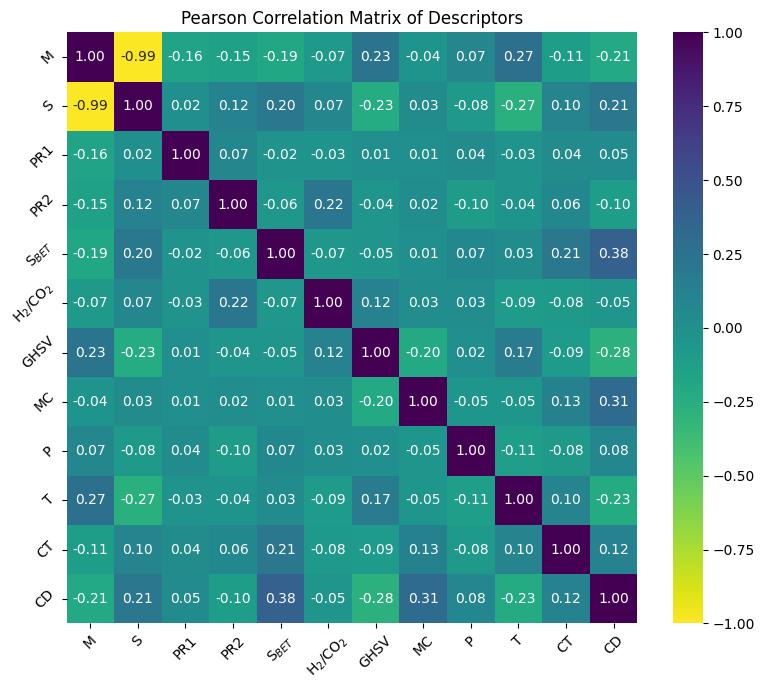

In [9]:
plt.figure(figsize=(8,7))
ax = sns.heatmap(
    data=pcm,
    fmt='.2f',
    annot=True,
    cmap='viridis_r',
    vmin=-1, vmax=1,
)


ax.set_title("Pearson Correlation Matrix of Descriptors")
ax.tick_params(axis='x', labelrotation=45) 
ax.tick_params(axis='y', labelrotation=45)  
plt.tight_layout()
plt.show()